In [1]:
!pip install pmdarima

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

In [3]:
df = pd.read_csv('/users/Delvefohoue/downloads/MaunaLoaDailyTemps.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [4]:
df=df[["DATE","AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [5]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

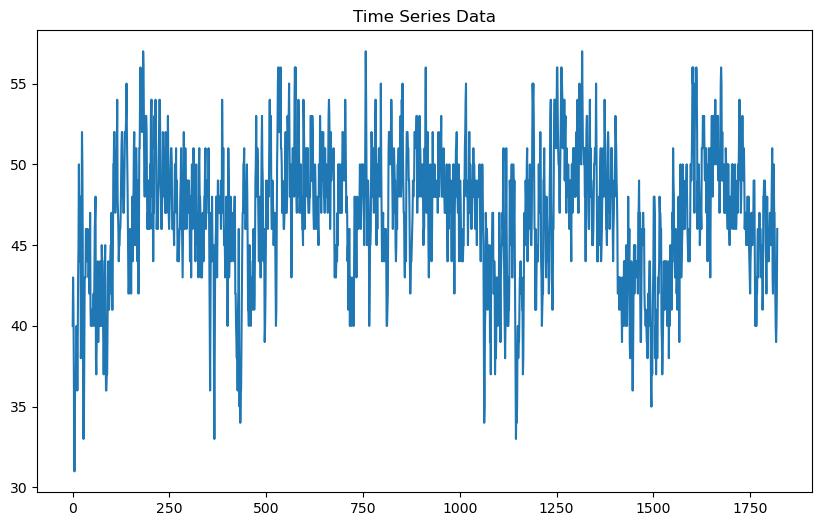

In [6]:
# Assuming 'df' is your DataFrame and 'AvgTemp' is the column you're analyzing
plt.figure(figsize=(10, 6))
plt.plot(df['AvgTemp'])
plt.title('Time Series Data')
plt.show()

In [7]:
result = adfuller(df['AvgTemp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] < 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -6.554680125068784
p-value: 8.675937480199322e-09
Critical Values: {'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}
The data is stationary (reject the null hypothesis).


In [ ]:
import pandas as pd
import pmdarima as pm

# Assume 'df' is your DataFrame and 'Date' is the date column, 'GDPg' is the target variable

# Convert the date column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

# Set the date as the index
df.set_index('DATE', inplace=True)

# Ensure the target variable is numeric
df['AvgTemp'] = pd.to_numeric(df['AvgTemp'], errors='coerce')

# Drop any rows with missing values after conversion
df.dropna(inplace=True)

 

# Now, fit the auto_arima model
smodel = pm.auto_arima(df['AvgTemp'], start_p=1, start_q=1,
                       test='adf', max_p=3, max_q=3, m=365,
                       start_P=0, seasonal=True,
                       d=0, D=1, trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample data: assuming 'df' is your DataFrame and the time series column is named 'value'
# 'value' is your target variable (e.g., sales, temperature)
# 'df.index' should be a DateTime index
# df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Define the parameters
p = 2  # Autoregressive order
d = 0  # Differencing order
q = 0  # Moving average order
P = 2  # Seasonal autoregressive order
D = 1  # Seasonal differencing order
Q = 0  # Seasonal moving average order
m = 365  # Number of periods per season (e.g., 12 for monthly data with yearly seasonality)

# Define the split point
train_size = int(len(df) * 0.8)  # 80% training, 20% testing
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit the SARIMA model
model = sm.tsa.SARIMAX(df['AvgTemp'], 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False, 
                       enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Print the model summary
print(model_fit.summary())

# Forecasting
n_periods = 365  # Define how many periods you want to forecast
forecast = model_fit.get_forecast(steps=n_periods)
forecast_index = pd.date_range(df.index[-1], periods=n_periods, freq='MS')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['AvgTemp'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='green')
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("AvgTemp")
plt.legend()
plt.show()

In [ ]:
# Get forecast values and confidence intervals
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [ ]:
# Print the forecast values and confidence intervals
for date, value, (lower, upper) in zip(forecast_index, forecast_mean, confidence_intervals.values):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Forecast: {value:.2f}, Confidence Interval: ({lower:.2f}, {upper:.2f})")

In [ ]:
# Debugging output
print(f'Test length: {len(test)}')
print(f'Forecast length: {len(forecast_values)}')

In [ ]:
# Check if lengths match
if len(test) != len(forecast_values):
    raise ValueError(f'Length mismatch: test length = {len(test)}, forecast length = {len(forecast_values)}')


In [ ]:
# Calculate RMSE
forecast_index = test.index  # Ensure the forecast index matches the test index
rmse = np.sqrt(mean_squared_error(test['AvgTemp'], forecast_values))
print(f'RMSE: {rmse}')

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(fitted_series, color='green')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast average temperature - Time Series Dataset")
plt.show()

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods=n_periods, freq='MS')

# Make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Debugging: Print the forecasted values and index
print("Forecasted Values:\n", fitted_series)
print("Confidence Interval Lower Bound:\n", lower_series)
print("Confidence Interval Upper Bound:\n", upper_series)

# Plot the original data
plt.plot(df, label='AvgTemp')

# Plot the forecasted values
plt.plot(fitted_series, color='red', label='Forecast')

# Plot the confidence intervals
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast average temperature - Time Series Dataset")
plt.legend()
plt.show()

In [ ]:
print(df.isna().sum())


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
single_forecast = smodel.predict(n_periods=12, return_conf_int=True)
print(single_forecast)

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(fitted_series, color='green')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast average temperature - Time Series Dataset")
plt.show()